In [1]:
import numpy as np
import pandas as pd

In [5]:
X = pd.read_csv('Classification/logisticX.csv')
Y = pd.read_csv('Classification/logisticY.csv')
X = X.values
Y = Y.values

In [6]:
print(X.shape,Y.shape)

(99, 2) (99, 1)


In [14]:
# Data Normalisation
u = X.mean(axis=0)
std = X.std(axis=0)

X = (X-u)/std

In [15]:
X[:5,:]

array([[-0.70739532,  1.49166385],
       [-1.39759229,  2.13781242],
       [-1.14266896,  0.89423113],
       [-1.28516611,  0.64964747],
       [-0.72243081,  1.37364094]])

In [16]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)
print(X[:5,:])

(99, 3)
[[ 1.         -0.70739532  1.49166385]
 [ 1.         -1.39759229  2.13781242]
 [ 1.         -1.14266896  0.89423113]
 [ 1.         -1.28516611  0.64964747]
 [ 1.         -0.72243081  1.37364094]]


In [17]:
import matplotlib.pyplot as plt

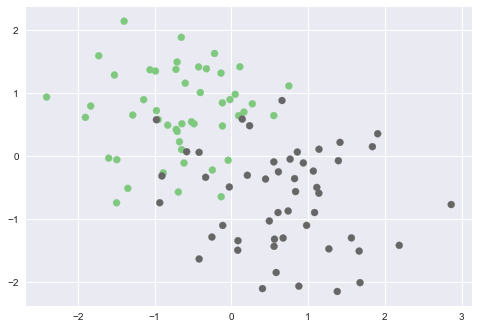

In [20]:
plt.style.use("seaborn")
plt.scatter(X[:,1],X[:,2],c=Y[:,0],cmap=plt.cm.Accent)
plt.show()

In [43]:
def sigmoid(z):
    return 1/(1.0 + np.exp(-z))

def getYPred(theta,X):
    return sigmoid(np.dot(X,theta))

def predict(theta,X):
    Y_pred = getYPred(theta,X)
    outputs = np.zeros((Y_pred.shape))
    outputs[Y_pred>0.5]=1
    return outputs

def error(X,Y,theta):
    Y_ = getYPred(theta,X)
    # Binary Cross Entropy
    e = -(np.sum(Y*np.log(Y_) + (1-Y)*np.log(1-Y_)))
    m = X.shape[0]
    return e/m

def getGrad(X,Y,theta):
    Y_ = getYPred(theta,X)
    grad = np.dot(X.T,(Y_-Y))
    return grad

In [44]:
def gradDescent(X,Y,lr,maxItr):
    theta = np.zeros((X.shape[1],1))
    error_list = [ ]
    
    for i in range(maxItr): 
        grad = getGrad(X,Y,theta)
        e = error(X,Y,theta) 
        theta = theta - lr*grad
        error_list.append(e)
        
    return theta,error_list

In [45]:
theta,error_list = gradDescent(X,Y,0.01,200)

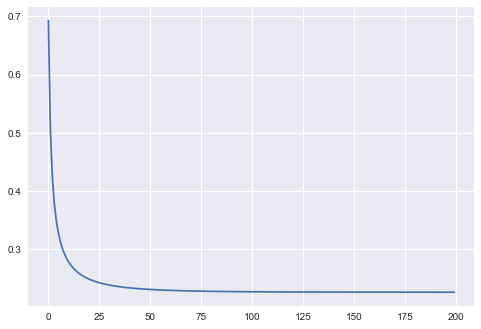

In [46]:
plt.plot(error_list)
plt.show()

In [47]:
theta

array([[ 0.44758903],
       [ 2.51128252],
       [-2.72696067]])

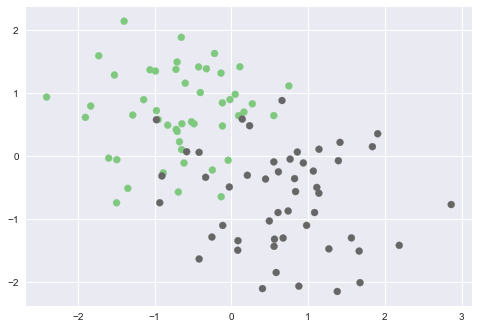

In [48]:
plt.style.use("seaborn")
plt.scatter(X[:,1],X[:,2],c=Y[:,0],cmap=plt.cm.Accent)
plt.show()

In [49]:
def visualiseBoundary():
    plt.style.use("seaborn")
    plt.scatter(X[:,1],X[:,2],c=Y[:,0],cmap=plt.cm.Accent)
    x1 = np.linspace(-3,+3,5)
    x2 = -(theta[0] + theta[1]*x1)/theta[2]
    plt.plot(x1,x2)
    plt.show()

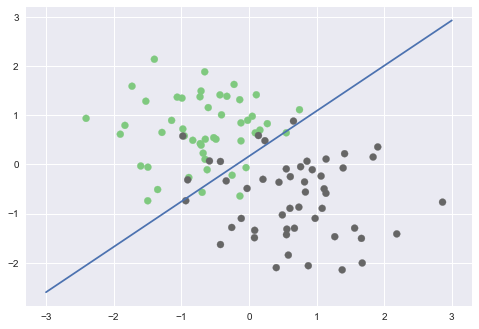

In [50]:
visualiseBoundary()

In [52]:
outputs = predict(theta,X)

In [54]:
outputs.shape

(99, 1)

In [57]:
acc = np.sum(outputs==Y)/X.shape[0]

In [69]:
print("Training Acc is %.2f  "%(acc*100))

Training Acc is 87.88  
